In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt

In [16]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [17]:
init_notebook_mode(connected=True)
cf.go_offline()

In [18]:
df=pd.read_csv('STEELPIPES.csv')

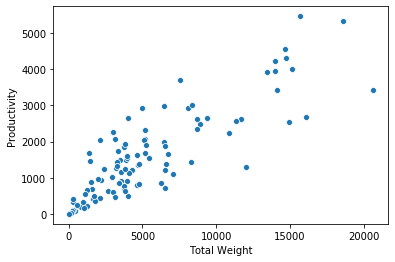

In [19]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [20]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.0,104.000000,104.000000,104.000000,6.600000e+01
mean,1144.586538,195188.701923,37.147500,48.209135,5321.200798,0.053173,0.005317,0.0,3.734904,5.821442,1570.885865,1.275819e+05
std,299.677581,4013.442744,53.029185,76.492608,4630.894960,0.046889,0.004689,0.0,14.765397,27.217894,1229.281673,9.329905e+05
min,523.000000,190817.000000,0.000000,0.000000,-0.003000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.550000e+03
25%,883.500000,192004.000000,0.000000,0.000000,2111.855750,0.020000,0.002000,0.0,0.000000,0.000000,658.340000,7.059000e+03
50%,1208.500000,192797.000000,0.000000,0.000000,3918.379500,0.040000,0.004000,0.0,0.000000,0.000000,1328.900000,1.371365e+04
75%,1344.250000,200313.250000,66.175000,85.545000,6645.104000,0.070000,0.007000,0.0,0.000000,0.000000,2247.490000,1.801050e+04
max,1658.000000,200895.000000,220.500000,425.920000,20622.000000,0.210000,0.021000,0.0,119.000000,230.680000,5463.790000,7.592186e+06


In [21]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [22]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(lm.intercept_)

413.27801539404004


In [24]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.21759


In [25]:
predictions = lm.predict(X_test)

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 448.43005193919885
MSE: 403446.1432068404
RMSE: 635.1741046412711
r2_score: 0.8258721030041903


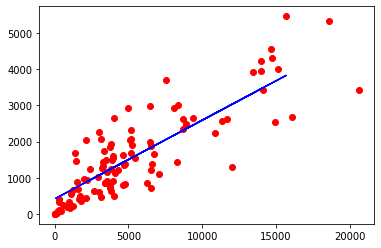

In [27]:
plt.scatter(X,y, color='red')
plt.plot(X_test, predictions,color="blue")

In [28]:
joblib.dump(lm,"Steel_Pipes.pkl")#only execute if rmse is less than half of mean of productivity

['Steel_Pipes.pkl']